# 1. Load the dataset

In [2]:
import sns as sns
import tqdm
import gdown
import zipfile

# Load the dataset from the local folder
dataset_url = 'https://drive.google.com/file/d/1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM/view?usp=sharing'
gdown.download(dataset_url, output='data.zip', quiet=False, fuzzy=True)

# extract the dataset from the zip file
with zipfile.ZipFile("data.zip","r") as zf:
    for member in tqdm.tqdm(zf.infolist(), desc='Extracting '):
        try:
            zf.extract(member, 'data')
        except zipfile.error as e:
            pass
print('Importing dataset completed')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM
From (redirected): https://drive.google.com/uc?id=1qjVfiihN_MNdrOJXZIaS_JQ8JzO5pxfM&confirm=t&uuid=ca6cd72f-1ee9-4613-9a97-50d67ecd52e9
To: C:\Users\jonat\PycharmProjects\ML-Final-Project\data.zip
100%|██████████| 583M/583M [02:04<00:00, 4.68MB/s] 
Extracting : 100%|██████████| 3770/3770 [00:07<00:00, 472.30it/s] 

Importing dataset completed


In [1]:
import pathlib

# Count the number of images in the dataset
data_dir = pathlib.Path('./data')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"The dataset contains {image_count} images")

The dataset contains 3770 images


In [2]:
# divide the dataset into 5 categories
categories = ['beauty', 'family', 'fashion', 'fitness', 'food']
label2id_dict = dict((name, index) for index, name in enumerate(categories))
id2label_dict = dict((index, name) for index, name in enumerate(categories))
print('The categories are: ', categories)
dataset = []
for category in categories:
    dataset.append(list(data_dir.glob(category+'/*.jpg')))
    print(f"{category} images: {len(list(data_dir.glob(category+'/*.jpg')))}")

The categories are:  ['beauty', 'family', 'fashion', 'fitness', 'food']
beauty images: 754
family images: 754
fashion images: 754
fitness images: 754
food images: 754


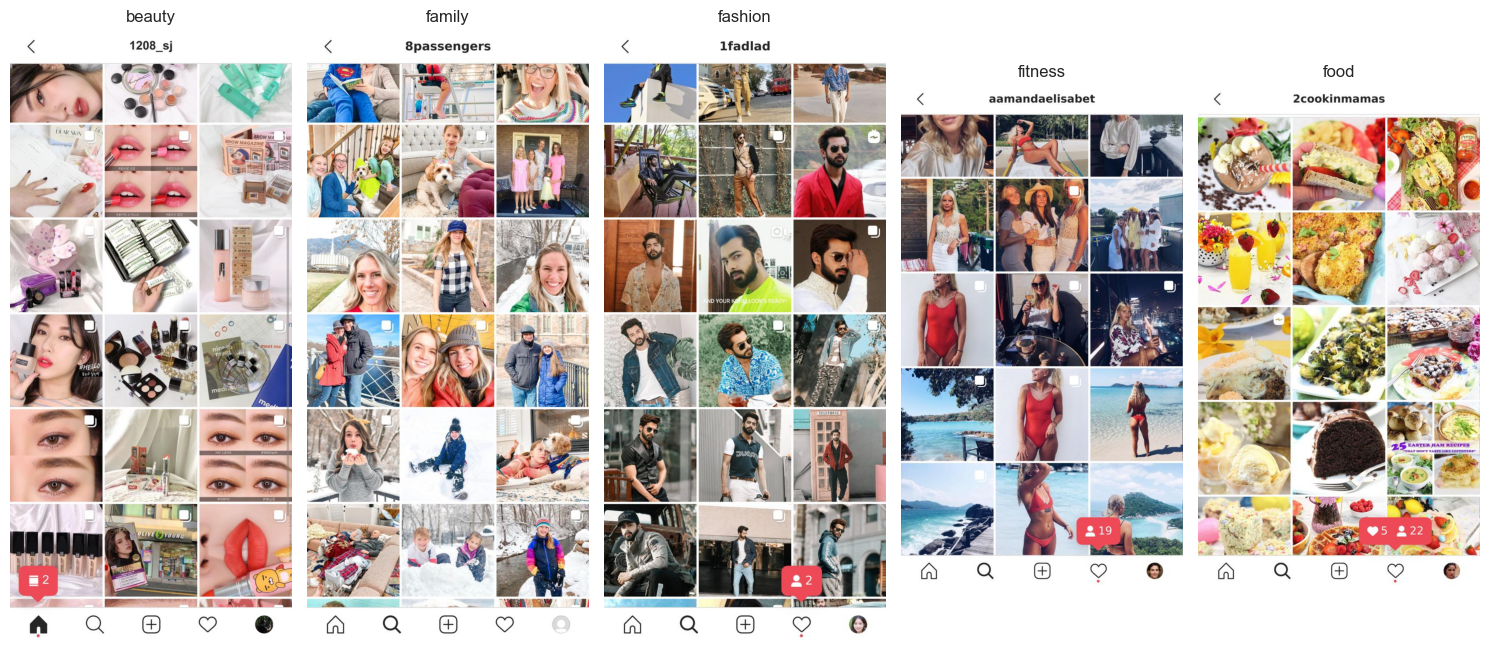

In [3]:
# plot one image per category
import matplotlib.pyplot as plt
import PIL

plt.figure(figsize=(15, 15))
for index, category in enumerate(categories):
    img = dataset[index][0]
    plt.subplot(1, 5, index+1)
    plt.imshow(PIL.Image.open(str(img)))
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 2. Process + Visualize the data

In [4]:
import numpy as np
import tensorflow as tf

seed = 42
# set seed for tensorflow take
tf.random.set_seed(seed)
# set seed for numpy
np.random.seed(seed)
print(f"Random seed set as {seed}")

Random seed set as 42


In [5]:
# split the dataset into training and testing
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 80% of the images are used for training, 20% for testing
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(128, 128),
    batch_size=1,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    color_mode="rgb",
    interpolation='lanczos5'
)

test_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=1,
    label_mode='categorical',
    shuffle=True,
    color_mode="rgb",
    interpolation='lanczos5'
)

# print the shape of the first image
for images, labels in train_ds.take(1):
    print(f"Shape of the image: {images[0].shape}")

Found 3770 files belonging to 5 classes.
Using 3016 files for training.
Found 3770 files belonging to 5 classes.
Using 754 files for validation.
Shape of the image: (128, 128, 3)


In [6]:
# print the first 10 rows of the training dataset in the format (image, label)
i = 0
for images, labels in train_ds.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")
    i+=1

Image 1: [[[255.00005 255.00005 255.00005]
  [255.00005 255.00005 255.00005]
  [255.00005 255.00005 255.00005]
  ...
  [255.00005 255.00005 255.00005]
  [255.00005 255.00005 255.00005]
  [255.00005 255.00005 255.00005]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[255.00002 255.00002 255.00002]
  [255.00002 255.00002 255.00002]
  [255.00002 255.00002 255.00002]
  ...
  [255.00002 255.00002 255.00002]
  [255.00002 255.00002 255.00002]
  [255.00002 255.00002 255.00002]]

 ...

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[254.99995 254.99995 254.99995]
  [254.99995 254.99995 254.99995]
  [254.99995 254.99995 254.99995]
  ...
  [254.99995 254.99995 254.99

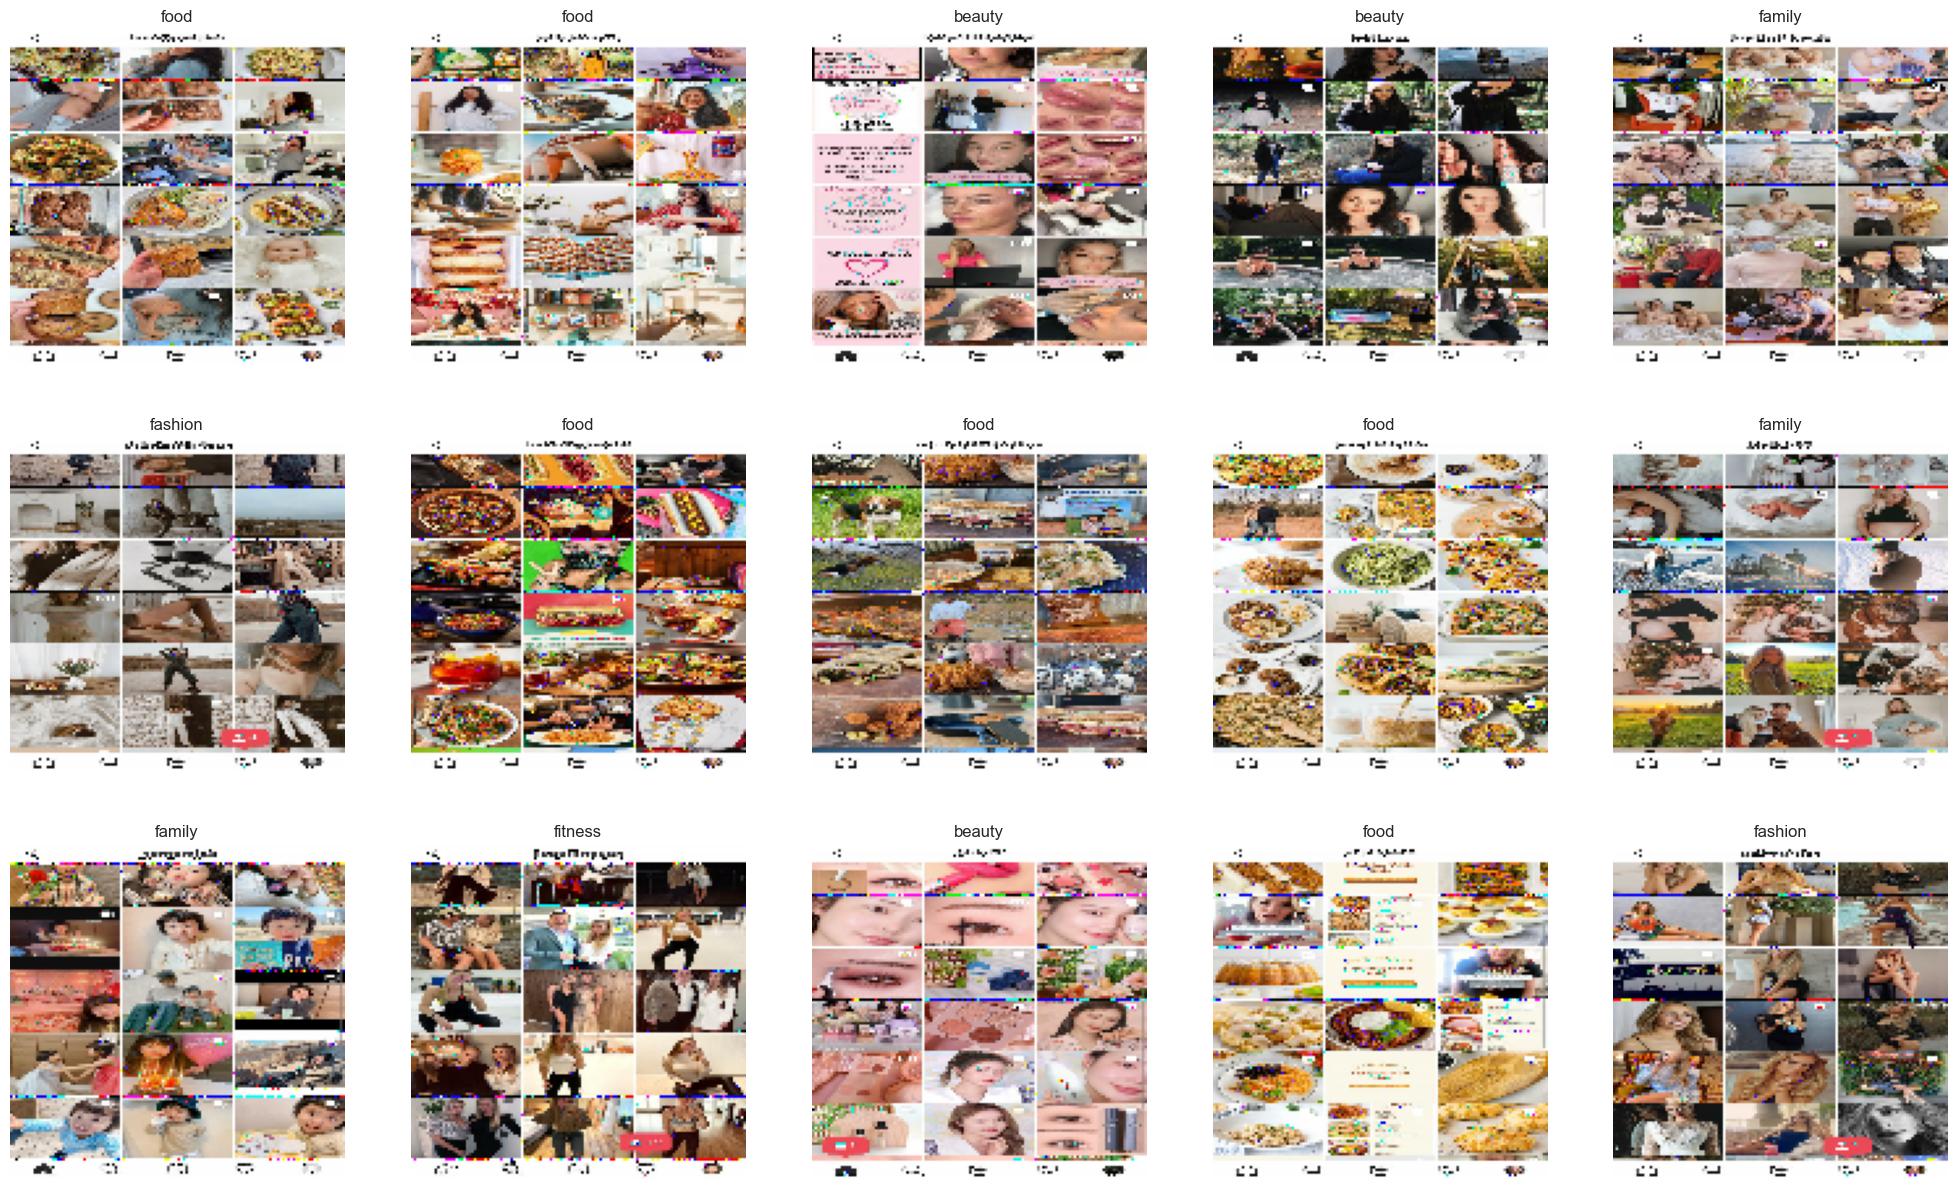

In [17]:
# plot the first 15 images of the training dataset
plt.figure(figsize=(25, 15))
i = 0
for images, labels in train_ds.take(15, ):
    image = images[0]
    label = labels[0]
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"), cmap='gray')
    plt.title(id2label_dict[label.numpy().argmax()])
    plt.axis("off")
    i += 1

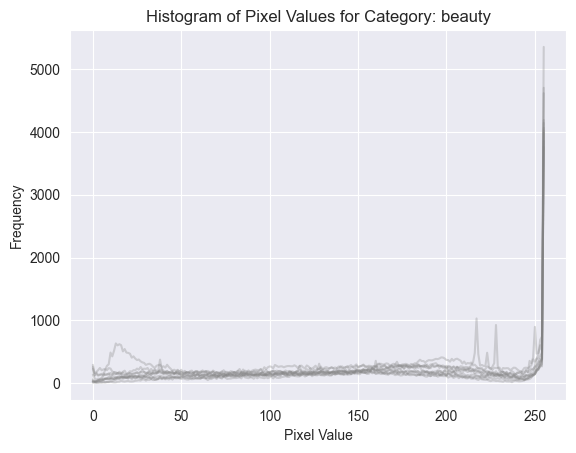

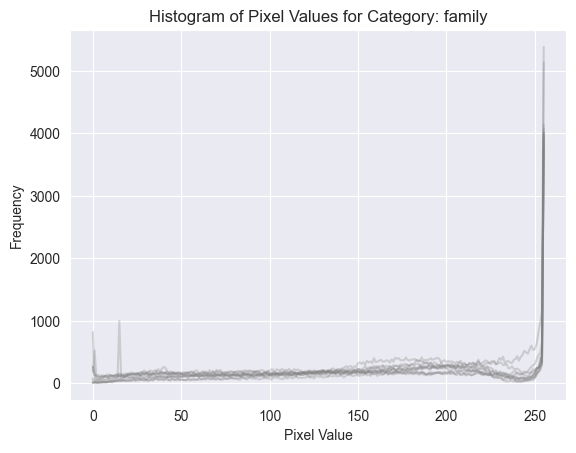

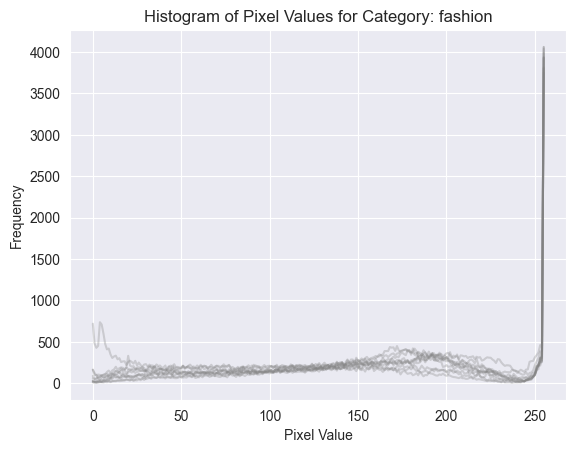

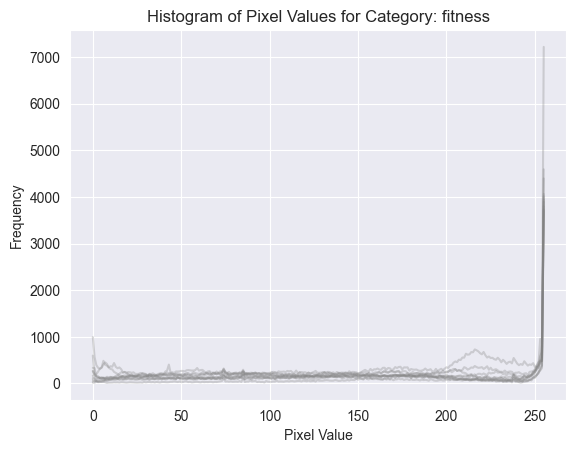

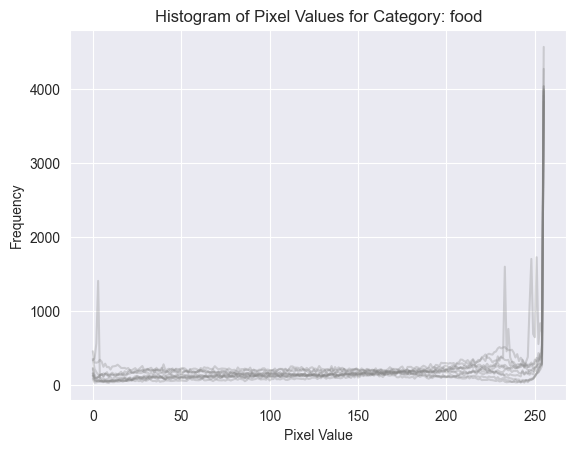

In [131]:
import numpy as np
import matplotlib.pyplot as plt

categories = train_ds.class_names

# Iterate over the categories
for category_index, category in enumerate(categories):
    histogram_values = []

    # Iterate over the train_ds dataset and compute histogram for the current category
    for images, labels in train_ds:
        image = images[0]  # Assuming batch size is 1
        label = labels[0].numpy()

        if np.argmax(label) == category_index:
            # Compute histogram of pixel values
            hist, bins = np.histogram(image.numpy().flatten(), bins=256, range=[0, 255])
            histogram_values.append(hist)

        if len(histogram_values) >= 10:  # Plot histograms for a maximum of 10 images per category
            break

    # Plot histogram for the current category
    plt.figure()
    # plot the histogram
    for hist_values in histogram_values:
        plt.plot(range(len(hist_values)), hist_values, color='grey', alpha=0.3)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Pixel Values for Category: {category}')
    plt.show()

Each image is 128x128 pixels with 1 channel (grayscale). The labels are one-hot encoded.
Each image contains multiple images in a grid. Now, we need to augment a new image from the grid image.

In [7]:
from keras.preprocessing.image import ImageDataGenerator
# Augment the image using keras preprocessing layers
data_augmentation = tf.keras.Sequential([
    # tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    # tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    # tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
    tf.keras.layers.experimental.preprocessing.RandomCrop(64, 64),
    tf.keras.layers.experimental.preprocessing.Normalization()
])

# augment the image in train_ds
train_ds_aug = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
test_ds_aug = test_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# print the shape of the first image
for images, labels in train_ds_aug.take(1):
    print(f"Shape of the image: {images[0].shape}")

Shape of the image: (64, 64, 3)


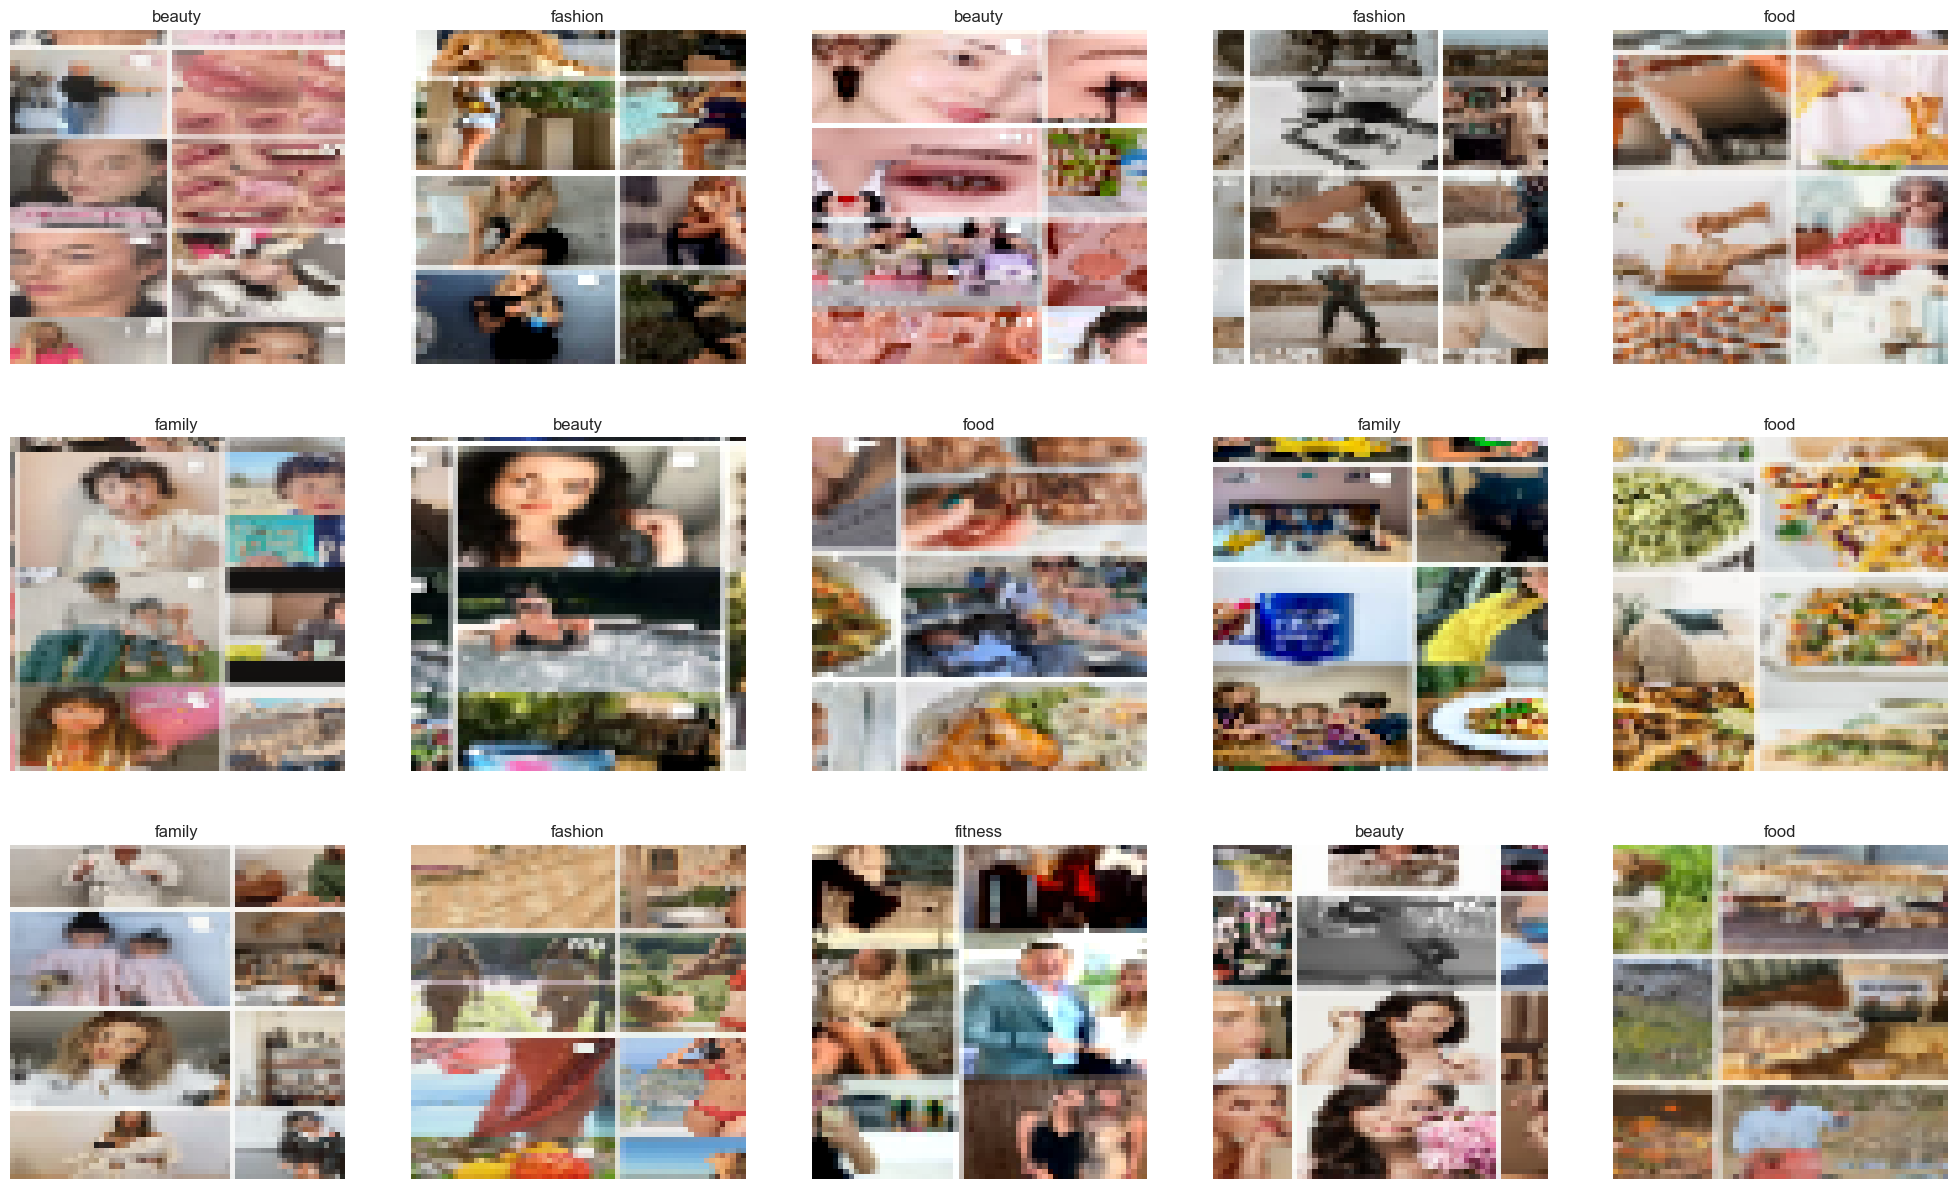

In [8]:

# plot the first 15 images of the training dataset
plt.figure(figsize=(25, 15))
i = 0
for images, labels in train_ds_aug.take(15, ):
    image = images[0]
    label = labels[0]
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"), cmap='gray')
    plt.title(id2label_dict[label.numpy().argmax()])
    plt.axis("off")
    i += 1

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model (excluding the top classification layers)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the weights of the VGG16 layers to prevent further training
vgg16.trainable = False

# Add a flatten layer to convert the output of VGG16 into a 1D array
flatten_layer = Flatten()(vgg16.output)

# Create a new model that takes VGG16 output as input and outputs the flattened representation
flatten_model = Model(inputs=vgg16.input, outputs=flatten_layer)

# Apply the flatten_model to train_ds_aug and test_ds_aug
train_ds = train_ds_aug.map(lambda x, y: (flatten_model(x), y))
test_ds = test_ds_aug.map(lambda x, y: (flatten_model(x), y))

# # normalize the pixel values
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# print the shape of the first image in the training dataset
for images, labels in train_ds.take(1):
    print(f"Shape of the image in train dataset: {images[0].shape}")

for images, labels in test_ds.take(1):
    print(f"Shape of the image in test dataset: {images[0].shape}")


Shape of the image in train dataset: (2048,)
Shape of the image in test dataset: (2048,)


In [102]:
# print the first 10 rows of the training dataset in the format (image, label)
i = 0
for images, labels in train_ds.take(5):
    print(f"Image {i+1}: {images[0]}")
    print(f"Label {i+1}: {labels[0]}")
    i+=1

Image 1: [0.         0.00696179 0.         ... 0.         0.19234556 0.        ]
Label 1: [0. 0. 0. 0. 1.]
Image 2: [0.         0.         0.         ... 0.         0.1425373  0.05727465]
Label 2: [0. 0. 1. 0. 0.]
Image 3: [0.09181073 0.         0.         ... 0.         0.05091283 0.        ]
Label 3: [0. 0. 0. 1. 0.]
Image 4: [0.         0.         0.         ... 0.         0.07874501 0.        ]
Label 4: [1. 0. 0. 0. 0.]
Image 5: [0.09099216 0.         0.         ... 0.         0.04939549 0.        ]
Label 5: [0. 0. 0. 0. 1.]


# 3. Build a model

In [10]:
# In order to run the model more efficiently, we will store parts of the dataset in cache memory.
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(5000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [229]:
from keras.layers.experimental import RandomFourierFeatures
from keras import Sequential

# Build a Quasi SVM model with linear kernel
gamma = 0.01

quasiSVM_model = Sequential([
    tf.keras.layers.Input(shape=(2048,)),
     RandomFourierFeatures(
        output_dim=512, scale=10.0, kernel_initializer="gaussian"
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax'),
])

# Compile the model
quasiSVM_model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
quasiSVM_model.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_fourier_features_5   (None, 512)               1049089   
 (RandomFourierFeatures)                                         
                                                                 
 dropout_162 (Dropout)       (None, 512)               0         
                                                                 
 dense_274 (Dense)           (None, 5)                 2565      
                                                                 
Total params: 1051654 (4.01 MB)
Trainable params: 2565 (10.02 KB)
Non-trainable params: 1049089 (4.00 MB)
_________________________________________________________________


In [189]:
# Train the model
history = quasiSVM_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    workers=8,
    use_multiprocessing=True
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.xlabel('Epoch')

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
import tensorflow as tf
from keras import Sequential

# Build an SVM model with linear kernel
gamma = 0.01

linearSVM_model = Sequential([
    tf.keras.layers.Input(shape=(2048,)),
    # tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(gamma))
])

# Compile the model
linearSVM_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.Hinge(),
    metrics=['accuracy']
)
linearSVM_model.summary()

Epoch 1/100
95/95 [==============================] - 123s 278ms/step - loss: 1.1751 - accuracy: 0.2613 - val_loss: 1.1293 - val_accuracy: 0.4377
Epoch 2/100
95/95 [==============================] - 1s 10ms/step - loss: 1.1122 - accuracy: 0.3591 - val_loss: 1.0736 - val_accuracy: 0.4589
Epoch 3/100
95/95 [==============================] - 1s 9ms/step - loss: 1.0812 - accuracy: 0.4078 - val_loss: 1.0507 - val_accuracy: 0.4960
Epoch 4/100
95/95 [==============================] - 1s 9ms/step - loss: 1.0602 - accuracy: 0.4493 - val_loss: 1.0367 - val_accuracy: 0.5066
Epoch 5/100
95/95 [==============================] - 1s 9ms/step - loss: 1.0506 - accuracy: 0.4532 - val_loss: 1.0284 - val_accuracy: 0.4894
Epoch 6/100
95/95 [==============================] - 1s 9ms/step - loss: 1.0446 - accuracy: 0.4595 - val_loss: 1.0228 - val_accuracy: 0.5027
Epoch 7/100
95/95 [==============================] - 1s 9ms/step - loss: 1.0355 - accuracy: 0.4765 - val_loss: 1.0166 - val_accuracy: 0.5146
Epoch 8/

Text(0.5, 0, 'Epoch')

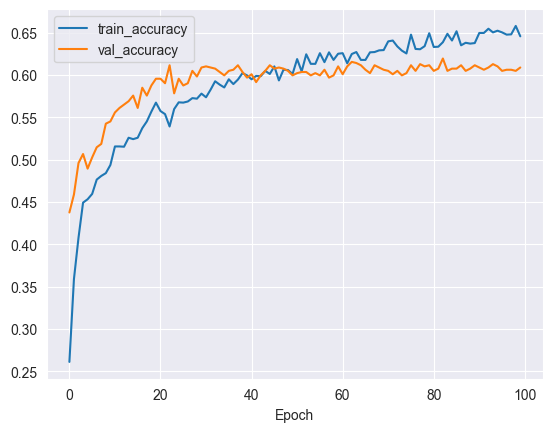

In [247]:
# Train the model
history = linearSVM_model.fit(
    train_ds.batch(32),
    validation_data=test_ds,
    epochs=100,
    workers=8,
    use_multiprocessing=True
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')

754/754 [==============================] - 1s 1ms/step


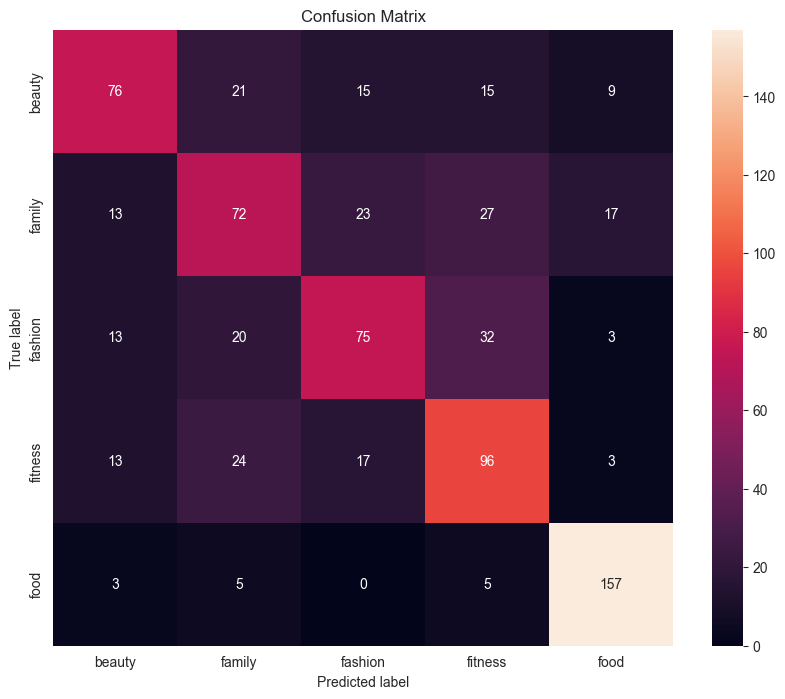

In [234]:
import seaborn as sns
# Confusion matrix
test_labels = test_ds.map(lambda x, y: y).unbatch()
test_labels = np.argmax(list(test_labels.as_numpy_iterator()), axis=1)
test_predictions = np.argmax(linearSVM_model.predict(test_ds.map(lambda x, y: x)), axis=1)
cm = tf.math.confusion_matrix(
    test_labels,
    test_predictions,
    num_classes=5
)

# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

# add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [248]:
import tensorflow_model_optimization as tfmot
cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 50,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS
}

# Cluster a whole model
clustered_model = cluster_weights(linearSVM_model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss=tf.keras.losses.SquaredHinge(),
  optimizer=opt,
  metrics=['accuracy'])

clustered_model.summary()

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_dropout_172 (Clust  (None, 2048)              0         
 erWeights)                                                      
                                                                 
 cluster_dense_284 (Cluster  (None, 64)                262258    
 Weights)                                                        
                                                                 
 cluster_dropout_173 (Clust  (None, 64)                0         
 erWeights)                                                      
                                                                 
 cluster_dense_285 (Cluster  (None, 32)                4178      
 Weights)                                                        
                                                                 
 cluster_dropout_174 (Clust  (None, 32)              

In [249]:
history = clustered_model.fit(
    train_ds.batch(32),
    validation_data=test_ds,
    epochs=10,
    workers=8,
    use_multiprocessing=True
)

Epoch 1/10
95/95 [==============================] - 12s 122ms/step - loss: 0.9986 - accuracy: 0.7510 - val_loss: 1.1037 - val_accuracy: 0.6101
Epoch 2/10
95/95 [==============================] - 12s 127ms/step - loss: 0.9981 - accuracy: 0.7510 - val_loss: 1.1036 - val_accuracy: 0.6088
Epoch 3/10
95/95 [==============================] - 12s 127ms/step - loss: 0.9977 - accuracy: 0.7530 - val_loss: 1.1033 - val_accuracy: 0.6101
Epoch 4/10
95/95 [==============================] - 12s 124ms/step - loss: 0.9973 - accuracy: 0.7527 - val_loss: 1.1033 - val_accuracy: 0.6101
Epoch 5/10
95/95 [==============================] - 12s 124ms/step - loss: 0.9969 - accuracy: 0.7546 - val_loss: 1.1034 - val_accuracy: 0.6114
Epoch 6/10
95/95 [==============================] - 12s 129ms/step - loss: 0.9966 - accuracy: 0.7556 - val_loss: 1.1034 - val_accuracy: 0.6114
Epoch 7/10
95/95 [==============================] - 12s 126ms/step - loss: 0.9962 - accuracy: 0.7566 - val_loss: 1.1034 - val_accuracy: 0.6114

In [111]:
# Convert the lists to NumPy arrays
train_lst = list(train_ds.as_numpy_iterator())
x_train, y_train = zip(*train_lst)
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
test_lst = list(test_ds.as_numpy_iterator())
x_test, y_test = zip(*test_lst)
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)
# print the first 5 elements of x_train and y_train
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06491477 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.00736946]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[0.12461091 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.06338086 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [263]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

# train the model and do random grid search with cross-validation and show progress
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'learning_rate': [0.01, 0.05, 0.1, 0.3, 1, 1.5, 2]}
ada_model = RandomizedSearchCV(ada_model, param_distributions=param_grid, cv=3, n_iter=10, n_jobs=1, verbose=1000)

# Train the model
ada_model.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=2, n_estimators=50...........................
[CV 1/3; 1/10] END learning_rate=2, n_estimators=50;, score=0.205 total time=   8.0s
[CV 2/3; 1/10] START learning_rate=2, n_estimators=50...........................
[CV 2/3; 1/10] END learning_rate=2, n_estimators=50;, score=0.124 total time=   8.0s
[CV 3/3; 1/10] START learning_rate=2, n_estimators=50...........................
[CV 3/3; 1/10] END learning_rate=2, n_estimators=50;, score=0.381 total time=   7.9s
[CV 1/3; 2/10] START learning_rate=1.5, n_estimators=400........................
[CV 1/3; 2/10] END learning_rate=1.5, n_estimators=400;, score=0.464 total time= 1.1min
[CV 2/3; 2/10] START learning_rate=1.5, n_estimators=400........................
[CV 2/3; 2/10] END learning_rate=1.5, n_estimators=400;, score=0.464 total time= 1.1min
[CV 3/3; 2/10] START learning_rate=1.5, n_estimators=400........................
[CV 3/3; 2/10] END lea

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(n_estimators=100,
                                                random_state=0),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1, 1.5, 2],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   verbose=1000)

In [264]:
# evaluate the model
ada_model.score(x_test, y_test)

0.5437665782493368

In [262]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the MLP model
def create_mlp_model():
    # model = Sequential([
    #     tf.keras.layers.Input(shape=(2048,)),
    #     # tf.keras.layers.Dense(1024, activation='relu'),
    #     tf.keras.layers.Dropout(0.5),
    #     tf.keras.layers.Dense(64, activation='relu'),
    #     tf.keras.layers.Dropout(0.5),
    #     tf.keras.layers.Dense(32, activation='relu'),
    #     tf.keras.layers.Dropout(0.5),
    #     tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
    # ])
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])
    return model

mlp_model = KerasClassifier(create_mlp_model, epochs=1, batch_size=32, verbose=0)

# Convert y_train_encoded to categorical
y_train_categorical = np.array(y_train_encoded)

# Fit the MLP model
mlp_model.fit(x_train, y_train_categorical)

# Calculate the accuracy score on the test set
mlp_score = mlp_model.score(x_test, y_test_encoded)

ada_model = AdaBoostClassifier(mlp_model, n_estimators=100, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {'base_estimator__epochs': [5, 1, 2],
              'base_estimator__batch_size': [16, 32, 64],
              'n_estimators': [5, 10, 50],
              'learning_rate': [0.01, 0.1, 1.0]}

# Create the RandomizedSearchCV object
ada_random_search = RandomizedSearchCV(ada_model,
                                       param_distributions=param_grid,
                                       cv=2,
                                       n_iter=2,
                                       n_jobs=-1,
                                       verbose=1000)

# Train the model using RandomizedSearchCV
ada_random_search.fit(x_train, y_train_encoded)


Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\jonat\PycharmProjects\ML-Final-Project\venv\lib\site-packages\sklearn\model_selection\_search.py:929: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


KeyboardInterrupt: 

In [255]:
# evaluate the model
ada_random_search.score(x_test, y_test)

0.5795755968169761